In [1]:
import pandas as pd



# Cargar los datos de cada año
df_2021 = pd.read_csv('/kaggle/input/proyecto-atus-20201-2023/atus_anual_2021.csv')
df_2022 = pd.read_csv('/kaggle/input/proyecto-atus-20201-2023/atus_anual_2022.csv')
df_2023 = pd.read_csv('/kaggle/input/proyecto-atus-20201-2023/atus_anual_2023.csv')

# Verificar que cada DataFrame se cargó correctamente
print("Tamaño del DataFrame 2021:", df_2021.shape)
print("Tamaño del DataFrame 2022:", df_2022.shape)
print("Tamaño del DataFrame 2023:", df_2023.shape)

# Combinar los DataFrames
df_combined = pd.concat([df_2021, df_2022, df_2023], ignore_index=True)


Tamaño del DataFrame 2021: (356315, 45)
Tamaño del DataFrame 2022: (392710, 45)
Tamaño del DataFrame 2023: (396628, 45)


1.Cargue en un Dataframe los datos de los accidentes de los últimos 3 años

In [2]:
df_combined

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,...,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS
0,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,...,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,NaN
1,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,...,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,NaN
2,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,...,0,0,0,0,0,0,0,Fatal,Cifras Definitivas,NaN
3,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,...,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,NaN
4,1,1,2021,1,0,50,1,Viernes,Accidente en intersección,Sin accidente en esta zona,...,1,0,0,0,0,0,0,No fatal,Cifras Definitivas,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145648,Municipal,32,56,2023,12,14,45,27,Miercoles,Accidente en no intersección,...,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
1145649,Municipal,32,56,2023,12,21,40,27,Miercoles,Accidente en no intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
1145650,Municipal,32,56,2023,12,14,30,29,Viernes,Accidente en no intersección,...,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
1145651,Municipal,32,56,2023,12,0,0,30,Sabado,Accidente en no intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas


2.Agregue una columna tipo date formada por los valores de las columnas correspondientes a Año, Mes, Dia, Hora y Minuto.

In [3]:

# Crear la nueva columna de tipo date
df_combined['FECHA'] = pd.to_datetime(
    df_combined['ANIO'].astype(str) + '-' + 
    df_combined['MES'].astype(str).str.zfill(2) + '-' + 
    df_combined['ID_DIA'].astype(str).str.zfill(2),
    format='%Y-%m-%d',
    errors='coerce'  # Esto manejará cualquier fecha inválida convirtiéndola en NaT
)

# Verificar el tipo de dato de la nueva columna
print("Tipo de dato de FECHA:", df_combined['FECHA'].dtype)

# Mostrar las primeras filas para verificar
print("\nPrimeras filas con la nueva columna FECHA:")
print(df_combined[['ANIO', 'MES', 'ID_DIA', 'FECHA']].head())

# Información sobre la nueva columna
print("\nDescripción de la columna FECHA:")
print(df_combined['FECHA'].describe())


Tipo de dato de FECHA: datetime64[ns]

Primeras filas con la nueva columna FECHA:
   ANIO  MES   ID_DIA FECHA
0     1    0  Viernes   NaT
1     1    0  Viernes   NaT
2     1    0  Viernes   NaT
3     1    0  Viernes   NaT
4     1    0  Viernes   NaT

Descripción de la columna FECHA:
count                           789333
mean     2023-01-02 15:47:35.894280448
min                2022-01-01 00:00:00
25%                2022-07-04 00:00:00
50%                2023-01-02 00:00:00
75%                2023-07-01 00:00:00
max                2023-12-31 00:00:00
Name: FECHA, dtype: object


comprobacion de que se creo la columna fecha de tipo date en dataframe

In [4]:
df_combined

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,...,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,FECHA
0,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,...,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,NaN,NaT
1,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,...,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,NaN,NaT
2,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,...,0,0,0,0,0,0,Fatal,Cifras Definitivas,NaN,NaT
3,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,...,0,0,0,0,0,0,No fatal,Cifras Definitivas,NaN,NaT
4,1,1,2021,1,0,50,1,Viernes,Accidente en intersección,Sin accidente en esta zona,...,0,0,0,0,0,0,No fatal,Cifras Definitivas,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145648,Municipal,32,56,2023,12,14,45,27,Miercoles,Accidente en no intersección,...,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,2023-12-27
1145649,Municipal,32,56,2023,12,21,40,27,Miercoles,Accidente en no intersección,...,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,2023-12-27
1145650,Municipal,32,56,2023,12,14,30,29,Viernes,Accidente en no intersección,...,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,2023-12-29
1145651,Municipal,32,56,2023,12,0,0,30,Sabado,Accidente en no intersección,...,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,2023-12-30


3.Agregue una columna para Área cuyos valores serán Urbana o Suburbana dependiendo del área donde ocurrió el accidente.

In [5]:
# Función para determinar el área
def determinar_area(row):
    if row['URBANA'] == 'Accidente en intersección' or row['URBANA'] == 'Accidente en no intersección':
        return 'Urbana'
    elif row['SUBURBANA'] == 'Accidente en camino rural':
        return 'Suburbana'
    else:
        return 'No especificado'

# Aplicar la función para crear la nueva columna
df_combined['AREA'] = df_combined.apply(determinar_area, axis=1)

# Mostrar las primeras filas para verificar
print(df_combined[['URBANA', 'SUBURBANA', 'AREA']].head(10))

# Mostrar la distribución de valores en la nueva columna
print(df_combined['AREA'].value_counts(dropna=False))

                       URBANA                              SUBURBANA  \
0  Sin accidente en esta zona        Colisión con vehículo automotor   
1  Sin accidente en esta zona        Colisión con vehículo automotor   
2  Sin accidente en esta zona  Colisión con peatón (atropellamiento)   
3  Sin accidente en esta zona               Colisión con objeto fijo   
4  Sin accidente en esta zona  Colisión con peatón (atropellamiento)   
5  Sin accidente en esta zona               Colisión con objeto fijo   
6  Sin accidente en esta zona               Colisión con objeto fijo   
7  Sin accidente en esta zona        Colisión con vehículo automotor   
8  Sin accidente en esta zona        Colisión con vehículo automotor   
9  Sin accidente en esta zona  Colisión con peatón (atropellamiento)   

              AREA  
0  No especificado  
1  No especificado  
2  No especificado  
3  No especificado  
4  No especificado  
5  No especificado  
6  No especificado  
7  No especificado  
8  No especificado

comprobacion de que se creo la comlumna area

In [6]:
df_combined

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,...,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,FECHA,AREA
0,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,...,0,0,0,0,0,Sólo daños,Cifras Definitivas,NaN,NaT,No especificado
1,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,...,0,0,0,0,0,Sólo daños,Cifras Definitivas,NaN,NaT,No especificado
2,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,...,0,0,0,0,0,Fatal,Cifras Definitivas,NaN,NaT,No especificado
3,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,...,0,0,0,0,0,No fatal,Cifras Definitivas,NaN,NaT,No especificado
4,1,1,2021,1,0,50,1,Viernes,Accidente en intersección,Sin accidente en esta zona,...,0,0,0,0,0,No fatal,Cifras Definitivas,NaN,NaT,No especificado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145648,Municipal,32,56,2023,12,14,45,27,Miercoles,Accidente en no intersección,...,0,0,0,0,0,0,No fatal,Cifras Definitivas,2023-12-27,Urbana
1145649,Municipal,32,56,2023,12,21,40,27,Miercoles,Accidente en no intersección,...,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,2023-12-27,Urbana
1145650,Municipal,32,56,2023,12,14,30,29,Viernes,Accidente en no intersección,...,0,0,0,0,0,0,No fatal,Cifras Definitivas,2023-12-29,Urbana
1145651,Municipal,32,56,2023,12,0,0,30,Sabado,Accidente en no intersección,...,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,2023-12-30,Urbana


4.Agregue una columna Zona cuyos valores serán la zona donde ocurrió el accidente

In [7]:
# Función para determinar la zona
def determinar_zona(row):
    if row['URBANA'] == 'Accidente en intersección':
        return 'Intersección'
    elif row['URBANA'] == 'Accidente en no intersección':
        return 'No intersección'
    elif row['SUBURBANA'] == 'Accidente en camino rural':
        return 'Camino rural'
    else:
        return 'No especificado'

# Aplicar la función para crear la nueva columna
df_combined['ZONA'] = df_combined.apply(determinar_zona, axis=1)

# Mostrar las primeras filas para verificar
print(df_combined[['URBANA', 'SUBURBANA', 'ZONA']].head(10))

# Mostrar la distribución de valores en la nueva columna
print(df_combined['ZONA'].value_counts(dropna=False))

                       URBANA                              SUBURBANA  \
0  Sin accidente en esta zona        Colisión con vehículo automotor   
1  Sin accidente en esta zona        Colisión con vehículo automotor   
2  Sin accidente en esta zona  Colisión con peatón (atropellamiento)   
3  Sin accidente en esta zona               Colisión con objeto fijo   
4  Sin accidente en esta zona  Colisión con peatón (atropellamiento)   
5  Sin accidente en esta zona               Colisión con objeto fijo   
6  Sin accidente en esta zona               Colisión con objeto fijo   
7  Sin accidente en esta zona        Colisión con vehículo automotor   
8  Sin accidente en esta zona        Colisión con vehículo automotor   
9  Sin accidente en esta zona  Colisión con peatón (atropellamiento)   

              ZONA  
0  No especificado  
1  No especificado  
2  No especificado  
3  No especificado  
4  No especificado  
5  No especificado  
6  No especificado  
7  No especificado  
8  No especificado

In [8]:
df_combined

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,...,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,FECHA,AREA,ZONA
0,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,...,0,0,0,0,Sólo daños,Cifras Definitivas,NaN,NaT,No especificado,No especificado
1,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,...,0,0,0,0,Sólo daños,Cifras Definitivas,NaN,NaT,No especificado,No especificado
2,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,...,0,0,0,0,Fatal,Cifras Definitivas,NaN,NaT,No especificado,No especificado
3,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,Sin accidente en esta zona,...,0,0,0,0,No fatal,Cifras Definitivas,NaN,NaT,No especificado,No especificado
4,1,1,2021,1,0,50,1,Viernes,Accidente en intersección,Sin accidente en esta zona,...,0,0,0,0,No fatal,Cifras Definitivas,NaN,NaT,No especificado,No especificado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145648,Municipal,32,56,2023,12,14,45,27,Miercoles,Accidente en no intersección,...,0,0,0,0,0,No fatal,Cifras Definitivas,2023-12-27,Urbana,No intersección
1145649,Municipal,32,56,2023,12,21,40,27,Miercoles,Accidente en no intersección,...,0,0,0,0,0,Sólo daños,Cifras Definitivas,2023-12-27,Urbana,No intersección
1145650,Municipal,32,56,2023,12,14,30,29,Viernes,Accidente en no intersección,...,0,0,0,0,0,No fatal,Cifras Definitivas,2023-12-29,Urbana,No intersección
1145651,Municipal,32,56,2023,12,0,0,30,Sabado,Accidente en no intersección,...,0,0,0,0,0,Sólo daños,Cifras Definitivas,2023-12-30,Urbana,No intersección


5.Elimine las columnas URBANA y SUBURBANA

In [9]:
# Eliminar las columnas 'URBANA' y 'SUBURBANA'
df_combined = df_combined.drop(['URBANA', 'SUBURBANA'], axis=1)

# Verificar que las columnas se hayan eliminado
print("Columnas en el DataFrame después de la eliminación:")
print(df_combined.columns.tolist())

# Mostrar las primeras filas del DataFrame actualizado
print("\nPrimeras filas del DataFrame actualizado:")
print(df_combined.head())

# Información general del DataFrame actualizado
print("\nInformación general del DataFrame actualizado:")
print(df_combined.info())

Columnas en el DataFrame después de la eliminación:
['COBERTURA', 'ID_ENTIDAD', 'ID_MUNICIPIO', 'ANIO', 'MES', 'ID_HORA', 'ID_MINUTO', 'ID_DIA', 'DIASEMANA', 'TIPACCID', 'AUTOMOVIL', 'CAMPASAJ', 'MICROBUS', 'PASCAMION', 'OMNIBUS', 'TRANVIA', 'CAMIONETA', 'CAMION', 'TRACTOR', 'FERROCARRI', 'MOTOCICLET', 'BICICLETA', 'OTROVEHIC', 'CAUSAACCI', 'CAPAROD', 'SEXO', 'ALIENTO', 'CINTURON', 'ID_EDAD', 'CONDMUERTO', 'CONDHERIDO', 'PASAMUERTO', 'PASAHERIDO', 'PEATMUERTO', 'PEATHERIDO', 'CICLMUERTO', 'CICLHERIDO', 'OTROMUERTO', 'OTROHERIDO', 'NEMUERTO', 'NEHERIDO', 'CLASACC', 'ESTATUS', 'FECHA', 'AREA', 'ZONA']

Primeras filas del DataFrame actualizado:
  COBERTURA  ID_ENTIDAD  ID_MUNICIPIO  ANIO  MES  ID_HORA  ID_MINUTO   ID_DIA  \
0         1           1          2021     1    0        0          1  Viernes   
1         1           1          2021     1    0        0          1  Viernes   
2         1           1          2021     1    0        0          1  Viernes   
3         1           1   

In [10]:
df_combined

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,TIPACCID,...,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,FECHA,AREA,ZONA
0,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,3,...,0,0,0,0,Sólo daños,Cifras Definitivas,NaN,NaT,No especificado,No especificado
1,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,1,...,0,0,0,0,Sólo daños,Cifras Definitivas,NaN,NaT,No especificado,No especificado
2,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,1,...,0,0,0,0,Fatal,Cifras Definitivas,NaN,NaT,No especificado,No especificado
3,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,1,...,0,0,0,0,No fatal,Cifras Definitivas,NaN,NaT,No especificado,No especificado
4,1,1,2021,1,0,50,1,Viernes,Accidente en intersección,1,...,0,0,0,0,No fatal,Cifras Definitivas,NaN,NaT,No especificado,No especificado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145648,Municipal,32,56,2023,12,14,45,27,Miercoles,Volcadura,...,0,0,0,0,0,No fatal,Cifras Definitivas,2023-12-27,Urbana,No intersección
1145649,Municipal,32,56,2023,12,21,40,27,Miercoles,Colisión con motocicleta,...,0,0,0,0,0,Sólo daños,Cifras Definitivas,2023-12-27,Urbana,No intersección
1145650,Municipal,32,56,2023,12,14,30,29,Viernes,Colisión con vehículo automotor,...,0,0,0,0,0,No fatal,Cifras Definitivas,2023-12-29,Urbana,No intersección
1145651,Municipal,32,56,2023,12,0,0,30,Sabado,Colisión con vehículo automotor,...,0,0,0,0,0,Sólo daños,Cifras Definitivas,2023-12-30,Urbana,No intersección


6.Determine cual municipio de cada estado tuvo más meses sin accidentes

In [11]:

 #Obtener todos los meses únicos en el dataset
todos_los_meses = pd.date_range(start=df_combined['FECHA'].min(), end=df_combined['FECHA'].max(), freq='MS')

# Crear un DataFrame con todos los meses para cada combinación de estado y municipio
df_todos_meses = pd.DataFrame(
    [(estado, municipio, mes) 
     for estado, municipio in df_combined[['ID_ENTIDAD', 'ID_MUNICIPIO']].drop_duplicates().values
     for mes in todos_los_meses],
    columns=['ID_ENTIDAD', 'ID_MUNICIPIO', 'FECHA']
)

# Marcar los meses con accidentes
df_accidentes = df_combined.groupby(['ID_ENTIDAD', 'ID_MUNICIPIO', pd.Grouper(key='FECHA', freq='MS')]).size().reset_index(name='ACCIDENTES')
df_todos_meses = df_todos_meses.merge(df_accidentes, on=['ID_ENTIDAD', 'ID_MUNICIPIO', 'FECHA'], how='left')
df_todos_meses['SIN_ACCIDENTES'] = df_todos_meses['ACCIDENTES'].isna()

# Contar meses sin accidentes por estado y municipio
meses_sin_accidentes = df_todos_meses[df_todos_meses['SIN_ACCIDENTES']].groupby(['ID_ENTIDAD', 'ID_MUNICIPIO']).size().reset_index(name='MESES_SIN_ACCIDENTES')

# Encontrar el municipio con más meses sin accidentes por estado
resultado = meses_sin_accidentes.loc[meses_sin_accidentes.groupby('ID_ENTIDAD')['MESES_SIN_ACCIDENTES'].idxmax()]

# Ordenar por ID_ENTIDAD para una mejor visualización
resultado = resultado.sort_values('ID_ENTIDAD')

print("Municipios con más meses sin accidentes por estado:")
for _, row in resultado.iterrows():
    print(f"Estado {row['ID_ENTIDAD']}: Municipio {row['ID_MUNICIPIO']} con {row['MESES_SIN_ACCIDENTES']} meses sin accidentes")

# Opcionalmente, guardar los resultados en un archivo CSV
resultado.to_csv('municipios_con_mas_meses_sin_accidentes.csv', index=False)

Municipios con más meses sin accidentes por estado:
Estado 1: Municipio 2021 con 24 meses sin accidentes
Estado 2: Municipio 2021 con 24 meses sin accidentes
Estado 3: Municipio 2021 con 24 meses sin accidentes
Estado 4: Municipio 2021 con 24 meses sin accidentes
Estado 5: Municipio 2021 con 24 meses sin accidentes
Estado 6: Municipio 2021 con 24 meses sin accidentes
Estado 7: Municipio 2021 con 24 meses sin accidentes
Estado 8: Municipio 2021 con 24 meses sin accidentes
Estado 9: Municipio 2021 con 24 meses sin accidentes
Estado 10: Municipio 2021 con 24 meses sin accidentes
Estado 11: Municipio 2021 con 24 meses sin accidentes
Estado 12: Municipio 2021 con 24 meses sin accidentes
Estado 13: Municipio 2021 con 24 meses sin accidentes
Estado 14: Municipio 2021 con 24 meses sin accidentes
Estado 15: Municipio 2021 con 24 meses sin accidentes
Estado 16: Municipio 2021 con 24 meses sin accidentes
Estado 17: Municipio 2021 con 24 meses sin accidentes
Estado 18: Municipio 2021 con 24 meses 

7.Resuma los accidentes del último año por tipo y que porcentaje representan

In [12]:
ultimo_anio = df_combined['ANIO'].max()
accidentes_ultimo_anio = df_combined[df_combined['ANIO'] == ultimo_anio]

resumen = accidentes_ultimo_anio['TIPACCID'].value_counts()
resumen_porcentaje = resumen / resumen.sum() * 100

print(f"\nResumen de accidentes en {ultimo_anio}:")
print(resumen_porcentaje)


Resumen de accidentes en 2023:
TIPACCID
Colisión con vehículo automotor          58.621429
Colisión con motocicleta                 14.477294
Colisión con objeto fijo                 11.152264
Certificado cero                          3.928114
Colisión con peatón (atropellamiento)     2.988443
Volcadura                                 2.886584
Salida del camino                         2.579747
Otro                                      1.463588
Colisión con ciclista                     0.990349
Caída de pasajero                         0.490888
Colisión con animal                       0.258681
Incendio                                  0.096060
Colisión con ferrocarril                  0.066561
Name: count, dtype: float64


8.Obtenga la cantidad de muertos y lesionados de los últimos 3 años

In [13]:

# Corregir los valores de la columna 'ANIO'
df_combined['ANIO'] = df_combined['ANIO'].replace(12, 2021)

# Obtener los últimos 3 años
ultimos_3_anios = sorted(df_combined['ANIO'].unique())[-3:]

# Filtrar el DataFrame para los últimos 3 años
df_ultimos_3_anios = df_combined[df_combined['ANIO'].isin(ultimos_3_anios)]

# Calcular el total de muertos y lesionados
muertos = df_ultimos_3_anios[['CONDMUERTO', 'PASAMUERTO', 'PEATMUERTO', 'CICLMUERTO', 'OTROMUERTO']].sum().sum()
lesionados = df_ultimos_3_anios[['CONDHERIDO', 'PASAHERIDO', 'PEATHERIDO', 'CICLHERIDO', 'OTROHERIDO']].sum().sum()

# Imprimir los resultados
print(f"\nEn los últimos 3 años ({min(ultimos_3_anios)}-{max(ultimos_3_anios)}):")
print(f"Total de muertos: {muertos}")
print(f"Total de lesionados: {lesionados}")

# Desglose por año
for anio in ultimos_3_anios:
    df_anio = df_ultimos_3_anios[df_ultimos_3_anios['ANIO'] == anio]
    muertos_anio = df_anio[['CONDMUERTO', 'PASAMUERTO', 'PEATMUERTO', 'CICLMUERTO', 'OTROMUERTO']].sum().sum()
    lesionados_anio = df_anio[['CONDHERIDO', 'PASAHERIDO', 'PEATHERIDO', 'CICLHERIDO', 'OTROHERIDO']].sum().sum()
    print(f"\nAño {anio}:")
    print(f"  Muertos: {muertos_anio}")
    print(f"  Lesionados: {lesionados_anio}")

# Verificar valores únicos en la columna 'ANIO'
print("\nValores únicos en la columna 'ANIO':")
print(sorted(df_combined['ANIO'].unique()))


En los últimos 3 años (2021-2023):
Total de muertos: 17947
Total de lesionados: 182188

Año 2021:
  Muertos: 7963
  Lesionados: 187

Año 2022:
  Muertos: 5181
  Lesionados: 91501

Año 2023:
  Muertos: 4803
  Lesionados: 90500

Valores únicos en la columna 'ANIO':
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 2021, 2022, 2023]


9.¿Cómo se compara el número de accidentes de cada año contra el anterior? ¿En qué porcentaje varió?

In [14]:
# Contar el número de accidentes por año
accidentes_por_anio = df_combined['ANIO'].value_counts().sort_index()

# Calcular la variación absoluta y porcentual
variacion_absoluta = accidentes_por_anio.diff()
variacion_porcentual = accidentes_por_anio.pct_change() * 100

# Crear un DataFrame con los resultados
resultados = pd.DataFrame({
    'Accidentes': accidentes_por_anio,
    'Variación Absoluta': variacion_absoluta,
    'Variación Porcentual': variacion_porcentual
})

# Ordenar el DataFrame por año de forma descendente
resultados = resultados.sort_index(ascending=False)

# Imprimir los resultados
print("Comparación del número de accidentes por año:")
print(resultados.to_string())

# Calcular y mostrar la variación promedio
variacion_promedio = variacion_porcentual.mean()
print(f"\nVariación porcentual promedio: {variacion_promedio:.2f}%")

# Identificar el año con mayor aumento y mayor disminución
mayor_aumento = variacion_porcentual.idxmax()
mayor_disminucion = variacion_porcentual.idxmin()

print(f"\nMayor aumento: {mayor_aumento} con {variacion_porcentual[mayor_aumento]:.2f}%")
print(f"Mayor disminución: {mayor_disminucion} con {variacion_porcentual[mayor_disminucion]:.2f}%")

Comparación del número de accidentes por año:
      Accidentes  Variación Absoluta  Variación Porcentual
ANIO                                                      
2023      396628              3918.0              0.997683
2022      392710            358730.0           1055.709241
2021       33980              2856.0              9.176198
11         31124             -1088.0             -3.377623
10         32212              3548.0             12.377896
9          28664                80.0              0.279877
8          28584             -1141.0             -3.838520
7          29725               196.0              0.663754
6          29529             -1695.0             -5.428517
5          31224              2465.0              8.571230
4          28759             -1253.0             -4.174997
3          30012              4282.0             16.642052
2          25730             -1042.0             -3.892126
1          26772                 NaN                   NaN

Variación

10.Seleccione una o dos características y haga una gráfica de cada una de las siguientes:
Histograma
Dispersión
Líneas

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


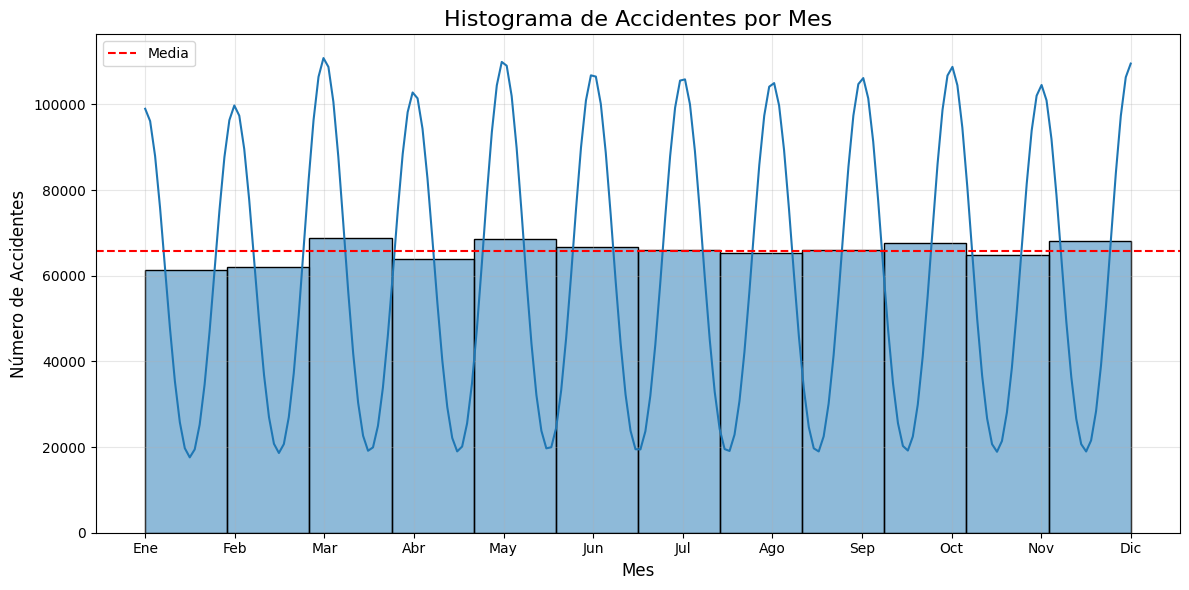

MES
1.0     61440
2.0     61928
3.0     68852
4.0     63938
5.0     68489
6.0     66685
7.0     66098
8.0     65411
9.0     66031
10.0    67574
11.0    64898
12.0    67989
Name: count, dtype: int64

Estadísticas descriptivas:
count    789333.000000
mean          6.557306
std           3.432298
min           1.000000
25%           4.000000
50%           7.000000
75%          10.000000
max          12.000000
Name: MES, dtype: float64


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# Extraer el mes de la columna FECHA
df_combined['MES'] = df_combined['FECHA'].dt.month

# Crear el histograma
plt.figure(figsize=(12, 6))
sns.histplot(data=df_combined, x='MES', bins=12, kde=True)

# Personalizar el gráfico
plt.title('Histograma de Accidentes por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número de Accidentes', fontsize=12)
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Añadir una línea de tendencia (KDE)
plt.axhline(y=df_combined['MES'].value_counts().mean(), color='r', linestyle='--', label='Media')

plt.legend()
plt.grid(True, alpha=0.3)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Imprimir estadísticas básicas
print(df_combined['MES'].value_counts().sort_index())
print("\nEstadísticas descriptivas:")
print(df_combined['MES'].describe())

In [ ]:
# Calcular el total de muertos y lesionados por accidente
df_combined['TOTAL_MUERTOS'] = df_combined[['CONDMUERTO', 'PASAMUERTO', 'PEATMUERTO', 'CICLMUERTO', 'OTROMUERTO']].sum(axis=1)
df_combined['TOTAL_LESIONADOS'] = df_combined[['CONDHERIDO', 'PASAHERIDO', 'PEATHERIDO', 'CICLHERIDO', 'OTROHERIDO']].sum(axis=1)

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_combined, x='TOTAL_LESIONADOS', y='TOTAL_MUERTOS', alpha=0.5)

# Personalizar el gráfico
plt.title('Relación entre Lesionados y Muertos en Accidentes', fontsize=16)
plt.xlabel('Número de Lesionados', fontsize=12)
plt.ylabel('Número de Muertos', fontsize=12)

# Añadir una línea de tendencia
sns.regplot(data=df_combined, x='TOTAL_LESIONADOS', y='TOTAL_MUERTOS', scatter=False, color='red')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Calcular la correlación
correlacion = df_combined['TOTAL_LESIONADOS'].corr(df_combined['TOTAL_MUERTOS'])
print(f"Correlación entre lesionados y muertos: {correlacion:.2f}")

# Estadísticas básicas
print("\nEstadísticas de Lesionados:")
print(df_combined['TOTAL_LESIONADOS'].describe())
print("\nEstadísticas de Muertos:")
print(df_combined['TOTAL_MUERTOS'].describe())

In [17]:
df_combined

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,TIPACCID,...,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,FECHA,AREA,ZONA,TOTAL_MUERTOS,TOTAL_LESIONADOS
0,1,1,2021,1,NaN,0,1,Viernes,Accidente en intersección,3,...,0,0,Sólo daños,Cifras Definitivas,NaN,NaT,No especificado,No especificado,0,0
1,1,1,2021,1,NaN,0,1,Viernes,Accidente en intersección,1,...,0,0,Sólo daños,Cifras Definitivas,NaN,NaT,No especificado,No especificado,0,0
2,1,1,2021,1,NaN,0,1,Viernes,Accidente en intersección,1,...,0,0,Fatal,Cifras Definitivas,NaN,NaT,No especificado,No especificado,0,1
3,1,1,2021,1,NaN,0,1,Viernes,Accidente en intersección,1,...,0,0,No fatal,Cifras Definitivas,NaN,NaT,No especificado,No especificado,1,0
4,1,1,2021,1,NaN,50,1,Viernes,Accidente en intersección,1,...,0,0,No fatal,Cifras Definitivas,NaN,NaT,No especificado,No especificado,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145648,Municipal,32,56,2023,12.0,14,45,27,Miercoles,Volcadura,...,0,0,0,No fatal,Cifras Definitivas,2023-12-27,Urbana,No intersección,0,1
1145649,Municipal,32,56,2023,12.0,21,40,27,Miercoles,Colisión con motocicleta,...,0,0,0,Sólo daños,Cifras Definitivas,2023-12-27,Urbana,No intersección,0,0
1145650,Municipal,32,56,2023,12.0,14,30,29,Viernes,Colisión con vehículo automotor,...,0,0,0,No fatal,Cifras Definitivas,2023-12-29,Urbana,No intersección,0,1
1145651,Municipal,32,56,2023,12.0,0,0,30,Sabado,Colisión con vehículo automotor,...,0,0,0,Sólo daños,Cifras Definitivas,2023-12-30,Urbana,No intersección,0,0
